In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('car_price_assign_processed.csv', delimiter=',')
df.head()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Rar_var,CarName_honda civic,CarName_mazda 626,CarName_mitsubishi g4,CarName_mitsubishi mirage g4,CarName_mitsubishi outlander,CarName_peugeot 504,CarName_subaru dl,CarName_toyota corolla,CarName_toyota corona,CarName_toyota mark ii,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_Rar_var,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_Rar_var,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_Rar_var,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
0,13495.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16500.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16500.0,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13950.0,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17450.0,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Removing the highly correlated features using pearson correlation

# By avoiding overfitting split the dataset

x = df.drop(['price'], axis=1)
y = df.price

from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [ ]:
X_train.shape, x_test.shape

((143, 61), (62, 61))

In [ ]:
X_train.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Rar_var,CarName_honda civic,CarName_mazda 626,CarName_mitsubishi g4,CarName_mitsubishi mirage g4,CarName_mitsubishi outlander,CarName_peugeot 504,CarName_subaru dl,CarName_toyota corolla,CarName_toyota corona,CarName_toyota mark ii,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_Rar_var,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_Rar_var,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_Rar_var,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
symboling,1.000000,-0.546537,-0.374573,-0.260420,-0.606380,-0.248560,-0.048167,-0.096908,0.048182,-0.190488,0.090435,0.223585,-0.047250,0.027708,-0.111508,0.011758,0.112139,0.112139,0.098724,0.137831,-0.125883,0.023769,0.020511,-0.003841,NaN,-0.199008,0.199008,0.079221,-0.079221,-0.681893,0.681893,0.261692,0.204820,0.467081,-0.391934,-0.337716,-0.098088,0.117613,-0.076108,-0.255151,0.255151,0.011758,0.170276,-0.148846,-0.165211,0.083299,0.057181,0.255151,0.016687,0.016687,-0.072113,-0.139756,0.102735,0.255151,-0.082493,0.018498,0.255151,0.146271,-0.199008,-0.047056,0.180432
wheelbase,-0.546537,1.000000,0.863088,0.782010,0.594178,0.759771,0.462462,0.466905,0.163650,0.304440,0.268731,-0.338352,-0.410417,-0.492190,-0.035570,-0.072328,-0.033642,-0.083080,-0.063715,-0.085657,0.386396,-0.102198,0.026587,-0.014592,NaN,0.357883,-0.357883,-0.324693,0.324693,0.437677,-0.437677,-0.217358,-0.007714,-0.372493,0.209813,0.315571,-0.081183,-0.453470,0.494779,0.232504,-0.232504,-0.004111,0.051541,0.486506,-0.154883,-0.229217,0.036767,-0.085657,-0.071750,0.134239,0.208625,-0.142249,0.055085,-0.085657,-0.112805,-0.431396,-0.085657,-0.040396,0.357883,0.339589,-0.137708
carlength,-0.374573,0.863088,1.000000,0.848613,0.440186,0.881106,0.633615,0.612340,0.155528,0.209712,0.511322,-0.261052,-0.647455,-0.692573,0.017064,-0.167534,-0.002141,-0.085214,-0.009232,-0.074002,0.289157,-0.114921,0.029548,-0.049127,NaN,0.260274,-0.260274,-0.315143,0.315143,0.359649,-0.359649,-0.042132,0.068432,-0.431759,0.186835,0.296383,-0.051757,-0.546117,0.575700,0.058326,-0.058326,0.014810,0.198390,0.326523,-0.251111,-0.142862,0.139166,-0.057088,-0.072627,0.139336,0.230758,-0.270797,0.195217,-0.057088,-0.230830,-0.541187,-0.057088,-0.002927,0.260274,0.516621,-0.094935
carwidth,-0.260420,0.782010,0.848613,1.000000,0.241770,0.864415,0.694323,0.547376,0.199361,0.225704,0.621983,-0.172093,-0.634490,-0.667160,-0.003221,-0.072870,0.017424,-0.068892,-0.006875,-0.030451,0.239376,-0.102224,0.007271,-0.051245,NaN,0.267625,-0.267625,-0.360017,0.360017,0.177484,-0.177484,-0.089930,0.095893,-0.215824,0.107272,0.120836,-0.057633,-0.462129,0.493226,0.056384,-0.056384,0.263664,0.069263,0.259057,-0.258036,-0.138259,0.274324,-0.006875,-0.019979,0.365565,0.374567,-0.428953,0.167575,-0.006875,-0.142961,-0.562866,-0.006875,0.020387,0.267625,0.460032,-0.054069
carheight,-0.606380,0.594178,0.440186,0.241770,1.000000,0.269344,-0.031275,0.173669,-0.067701,0.286997,-0.186471,-0.329272,0.046626,-0.029003,0.088591,-0.034864,-0.094231,-0.167247,-0.188195,-0.161175,0.259718,0.077138,-0.039585,-0.033906,NaN,0.313609,-0.313609,-0.142588,0.142588,0.590172,-0.590172,-0.208025,-0.077062,-0.469350,0.176997,0.532489,0.123674,-0.109174,0.056349,0.118715,-0.118715,-0.104567,-0.098733,0.366894,0.032964,-0.030351,-0.199540,-0.234515,-0.148404,-0.032991,0.126238,0.181297,-0.148962,-0.234515,0.048256,-0.023703,-0.234515,-0.114525,0.313609,0.038391,-0.293703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

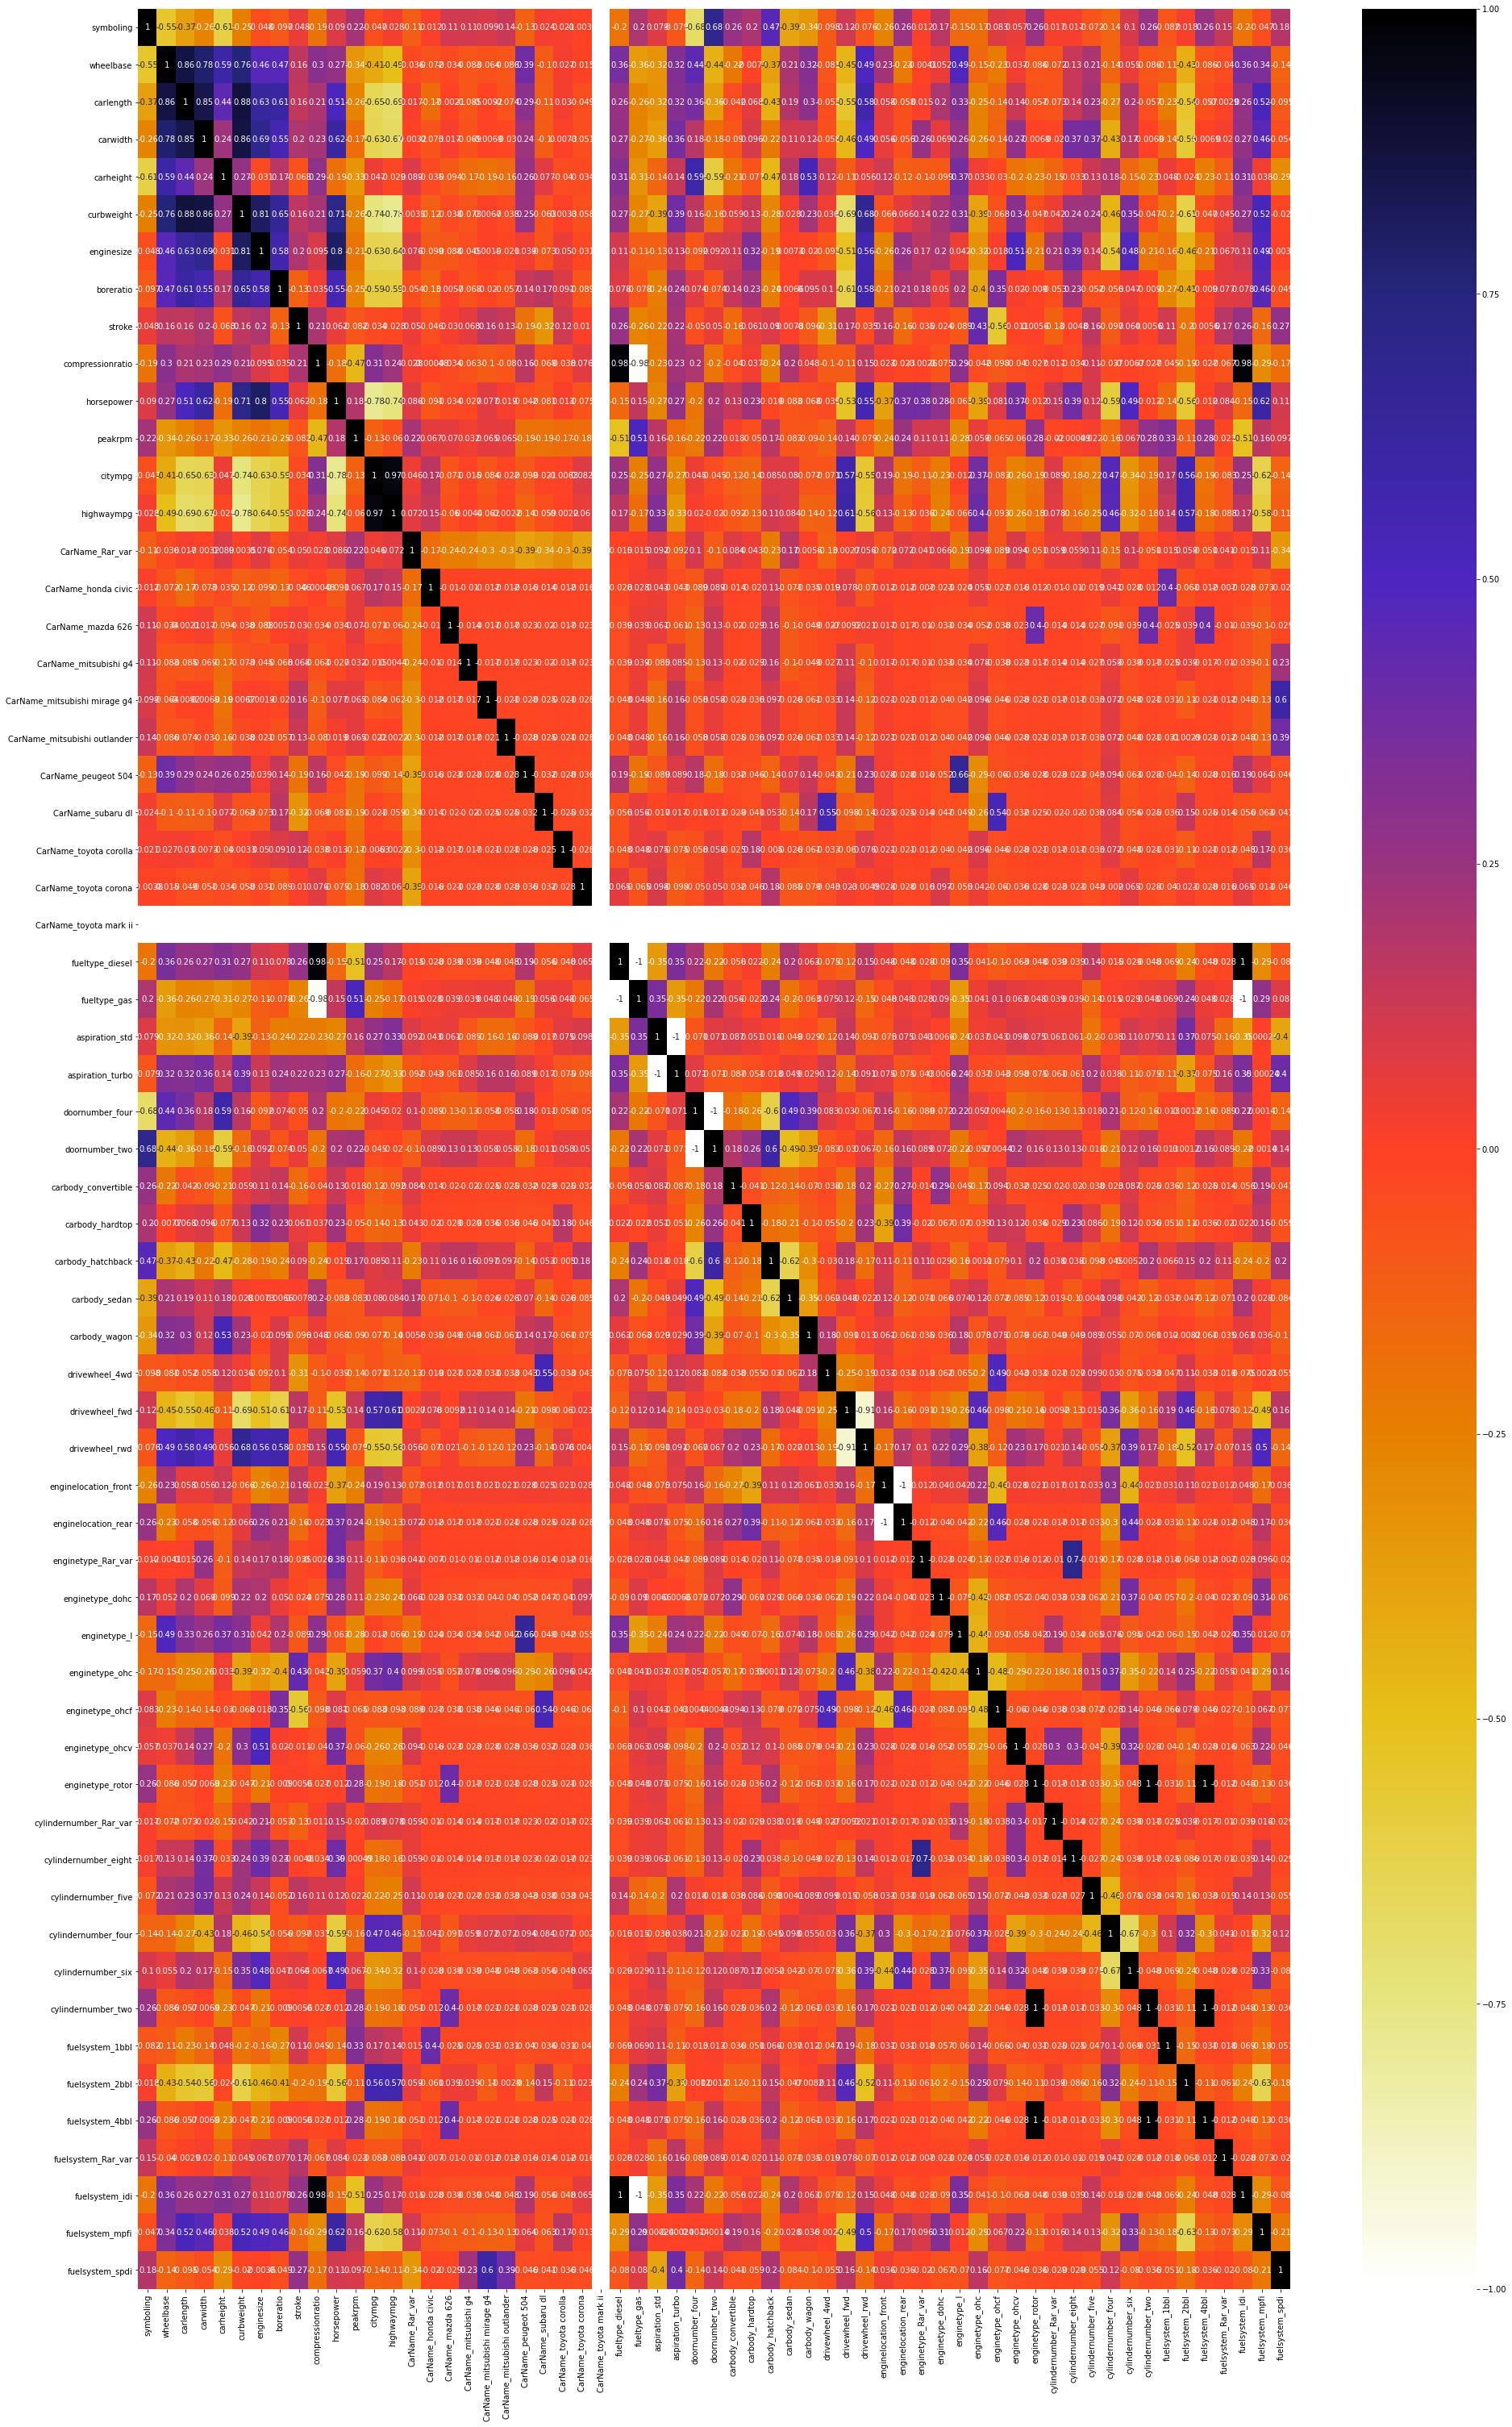

In [ ]:
plt.figure(figsize=(32,52))
sns.heatmap(X_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# Following method check the each feature with other all feature and select highly correlated features 
# # it will remove the first feature that is correlated with anything other feature

def pearson_correlation(data=None, thresold=None):
  cor_col = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > thresold:
        cor_col.add(corr_matrix.columns[i])
  return cor_col

In the above method the negative correlation also be taken to converted as a positive

In [ ]:
corr_features = pearson_correlation(X_train, 0.85)
corr_features = list(corr_features)
corr_features

['fueltype_diesel',
 'aspiration_turbo',
 'doornumber_two',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'highwaympg',
 'fueltype_gas',
 'curbweight',
 'carlength',
 'cylindernumber_two',
 'enginelocation_rear',
 'drivewheel_rwd']

In [ ]:
X_train.drop(corr_features, axis=1, inplace=True)
x_test.drop(corr_features, axis=1, inplace=True)
# Y_train.drop(corr_features, axis=1, inplace=True)
# y_test.drop(corr_features, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict the test result
y_predict = linear.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predict)
score

0.7325136809975197

In [ ]:
# Check the multicolinarity bewteen the independant variable
# y = b0 + b1m1 + b2m2
import statsmodels.api as sm

x = sm.add_constant(x)

In [ ]:
x

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Rar_var,CarName_honda civic,CarName_mazda 626,CarName_mitsubishi g4,CarName_mitsubishi mirage g4,CarName_mitsubishi outlander,CarName_peugeot 504,CarName_subaru dl,CarName_toyota corolla,CarName_toyota corona,CarName_toyota mark ii,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_Rar_var,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_Rar_var,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_Rar_var,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
0,1.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
201,1.0,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
202,1.0,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,1.0,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,

In [ ]:
model = sm.OLS(y, x).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     50.02
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.45e-73
Time:                        12:15:58   Log-Likelihood:                -1843.2
No. Observations:                 205   AIC:                             3786.
Df Residuals:                     155   BIC:                             3953.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3213.3538   1174.392      2.736      0.007     893.475    5533.233
symboling                      809.9935   1211.096      0.669      0.505   -1582.390    3202.377
wheelbase                     2239.7488   3435.815      0.652      0.515   -4547.315    9026.813
carlength                    -2924.3478   3381.505     -0.865      0.388   -9604.130    3755.434
carwidth                      7418.8229   2946.886      2.518      0.013    1597.581    1.32e+04
carheight                     1565.2394   1649.376      0.949      0.344   -1692.917    4823.396
curbweight                    1.107e+04   4467.179      2.478      0.014    2246.205    1.99e+04
enginesize                    2.514e+04   6050.877      4.154      0.000    1.32e+04    3.71e+04
boreratio                     -841.3200   1959.686     -0.429      0.668   -4712.458    3029.818
stroke                       -8126.3513   1895.102     -4.288      0.000   -1.19e+04   -4382.792
compressionratio             -1.786e+04   8021.019     -2.227      0.027   -3.37e+04   -2019.496
horsepower                      80.6734   5464.692      0.015      0.988   -1.07e+04    1.09e+04
peakrpm                       6249.2045   1752.791      3.565      0.000    2786.763    9711.646
citympg                      -6803.7892   5611.479     -1.212      0.227   -1.79e+04    4281.055
highwaympg                    9405.5352   5294.884      1.776      0.078   -1053.909    1.99e+04
CarName_Rar_var                -32.9730    535.002     -0.062      0.951   -1089.810    1023.863
CarName_honda civic           2386.1960   1478.424      1.614      0.109    -534.263    5306.655
CarName_mazda 626             -746.5000   1385.122     -0.539      0.591   -3482.652    1989.652
CarName_mitsubishi g4           72.2960   1405.355      0.051      0.959   -2703.825    2848.417
CarName_mitsubishi mirage g4   428.3580   1639.217      0.261      0.794   -2809.731    3666.447
CarName_mitsubishi outlander  -958.9910   1397.830     -0.686      0.494   -3720.246    1802.264
CarName_peugeot 504            760.0568   1374.576      0.553      0.581   -1955.263    3475.376
CarName_subaru dl              717.7799   1482.987      0.484      0.629   -2211.693    3647.252
CarName_toyota corolla        -119.9854   1039.146     -0.115      0.908   -2172.701    1932.730
CarName_toyota corona         -647.1613    973.093     -0.665      0.507   -2569.397    1275.074
CarName_toyota mark ii        1354.2779   1312.856      1.032      0.304   -1239.120    3947.676
fueltype_diesel               6632.5471   2514.309      2.638      0.009    1665.814    1.16e+04
fueltype_gas                 -3419.1933   1723.334     -1.984      0.049   -6823.444     -14.942
aspiration_std                 767.0793    793.157      0.967      0.335    

In [ ]:
p_value_col = model.pvalues
p_value_col

const                 0.006941
symboling             0.504611
wheelbase             0.515442
carlength             0.388481
carwidth              0.012834
                        ...   
fuelsystem_4bbl       0.611234
fuelsystem_Rar_var    0.381238
fuelsystem_idi        0.009192
fuelsystem_mpfi       0.552940
fuelsystem_spdi       0.081748
Length: 62, dtype: float64

In [ ]:
p = pd.Series(p_value_col.values,index = list(x.columns))      
pmax = max(p)
pmax

0.9885017893308952

In [ ]:
elimintion_col = [x for x in list(x.columns) if p_value_col[x] < 0.05]
elimintion_col

['const',
 'carwidth',
 'curbweight',
 'enginesize',
 'stroke',
 'compressionratio',
 'peakrpm',
 'fueltype_diesel',
 'fueltype_gas',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'carbody_convertible',
 'drivewheel_rwd',
 'enginelocation_front',
 'enginelocation_rear',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_two',
 'fuelsystem_idi']

In [ ]:
x = x.drop(elimintion_col, axis=1)

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=3)

In [ ]:
X_train.shape, x_test.shape

((143, 37), (62, 37))

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predict the test result
y_predict = linear.predict(x_test)

In [ ]:
score=r2_score(y_test,y_predict)
score

0.8041854319439696

In [ ]:
model_2 = sm.OLS(y, x).fit()

In [ ]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     29.56
Date:                Sun, 04 Jul 2021   Prob (F-statistic):           1.40e-55
Time:                        12:19:24   Log-Likelihood:                -1928.2
No. Observations:                 205   AIC:                             3930.
Df Residuals:                     168   BIC:                             4053.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
symboling                     3267.9354   1544.476      2.116      0.036     218.855    6317.016
wheelbase                     2.056e+04   3929.037      5.232      0.000    1.28e+04    2.83e+04
carlength                      128.2262   4145.823      0.031      0.975   -8056.396    8312.848
carheight                      276.3504   1979.232      0.140      0.889   -3631.021    4183.722
boreratio                    -2784.7269   1983.358     -1.404      0.162   -6700.243    1130.789
horsepower                    3.804e+04   4740.923      8.024      0.000    2.87e+04    4.74e+04
citympg                       -975.2854   7247.339     -0.135      0.893   -1.53e+04    1.33e+04
highwaympg                    1736.7062   6914.012      0.251      0.802   -1.19e+04    1.54e+04
CarName_Rar_var               8205.1827   3719.127      2.206      0.029     862.937    1.55e+04
CarName_honda civic           1.142e+04   4581.838      2.492      0.014    2374.037    2.05e+04
CarName_mazda 626             7708.7679   4304.823      1.791      0.075    -789.750    1.62e+04
CarName_mitsubishi g4         8296.1924   4391.817      1.889      0.061    -374.067     1.7e+04
CarName_mitsubishi mirage g4  7208.1849   4693.979      1.536      0.127   -2058.600    1.65e+04
CarName_mitsubishi outlander  7283.0369   4431.542      1.643      0.102   -1465.647     1.6e+04
CarName_peugeot 504           8835.9333   4102.027      2.154      0.033     737.773    1.69e+04
CarName_subaru dl             8892.4347   4220.558      2.107      0.037     560.271    1.72e+04
CarName_toyota corolla        6373.1480   3994.655      1.595      0.112   -1513.041    1.43e+04
CarName_toyota corona         7345.8710   3976.073      1.848      0.066    -503.634    1.52e+04
CarName_toyota mark ii        9145.9424   4070.579      2.247      0.026    1109.867    1.72e+04
aspiration_std                2140.8719    975.770      2.194      0.030     214.521    4067.223
carbody_hardtop              -5962.9523   1877.274     -3.176      0.002   -9669.038   -2256.866
carbody_hatchback            -9052.7511   1621.688     -5.582      0.000   -1.23e+04   -5851.238
carbody_sedan                -7993.6955   1698.751     -4.706      0.000   -1.13e+04   -4640.047
carbody_wagon                -9445.9061   1893.139     -4.990      0.000   -1.32e+04   -5708.500
drivewheel_4wd                 344.4094   1551.000      0.222      0.825   -2717.552    3406.371
drivewheel_fwd               -1569.0271    823.572     -1.905      0.058   -3194.911      56.856
enginetype_Rar_var           -9170.4906   4592.086     -1.997      0.047   -1.82e+04    -104.862
enginetype_dohc              -3887.3659   1114.770     -3.487      0.001   -6088.127   -1686.604
enginetype_l                 -4045.5205   1709.083     -2.367      0.019   -

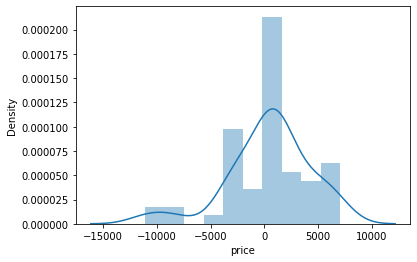

In [ ]:
sns.distplot(y_test-y_predict)

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_predict = lasso_reg.predict(x_test)

In [ ]:
score=r2_score(y_test,lasso_predict)
score

0.8045451418751672

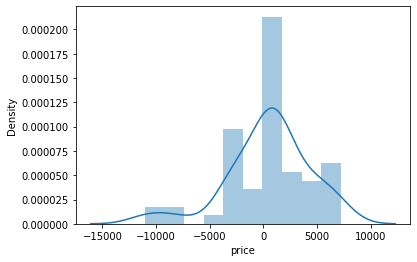

In [ ]:
sns.distplot(y_test-lasso_predict)

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_predict = ridge_reg.predict(x_test)

In [ ]:
score=r2_score(y_test,ridge_predict)
score

0.7384155227128929

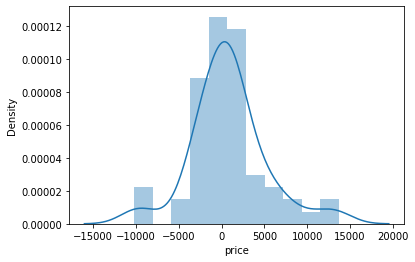

In [ ]:
sns.distplot(y_test-ridge_predict)